In [13]:
# Import modules
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Welch's t-test
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

color_palette = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']
color_palette_6 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']


## Read Data
### No buffer

In [14]:
no_buffer_analysis_path = '../data_no_buffer_analysis_blocks'

no_buffer_imagery = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_imagery_analysis.csv'))
no_buffer_perception = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_perception_analysis.csv'))
no_buffer_vviq = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_vivid_analysis.csv'))
no_buffer_semantic = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_semantic_analysis.csv'))

### New stimulus

In [15]:
new_stimulus_analysis_path = '../data_new_stimulus_analysis_blocks'

new_stimulus_imagery = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_imagery_analysis.csv'))
new_stimulus_perception = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_perception_analysis.csv'))
new_stimulus_vviq = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_vivid_analysis.csv'))
new_stimulus_semantic = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_semantic_analysis.csv'))

### Online

In [16]:
online_analysis_path = '../data_online_analysis_blocks'

online_imagery = pd.read_csv(os.path.join(online_analysis_path, 'df_imagery_analysis.csv'))
online_perception = pd.read_csv(os.path.join(online_analysis_path, 'df_perception_analysis.csv'))
online_vviq = pd.read_csv(os.path.join(online_analysis_path, 'df_vivid_analysis.csv'))


### Combine 3 datasource and imagery and perception

In [17]:
no_buffer_imagery['IorP'] = 'Imagery'
no_buffer_perception['IorP'] = 'Perception'
new_stimulus_imagery['IorP'] = 'Imagery'
new_stimulus_perception['IorP'] = 'Perception'
online_imagery['IorP'] = 'Imagery'
online_perception['IorP'] = 'Perception'

df_all = pd.concat([no_buffer_imagery, no_buffer_perception, new_stimulus_imagery, new_stimulus_perception, online_imagery, online_perception]).reset_index(drop=True)

# normalize ans_rt and vividness_rt for each individual, combining imagery and perception
df_all['ans_rt_norm'] = df_all.groupby(['participant'])['ans_rt'].apply(lambda x: (x - x.mean()) / x.std())
df_all['vividness_rt_norm'] = df_all.groupby(['participant'])['vividness_rt'].apply(lambda x: (x - x.mean()) / x.std())
df_all['confidence_rt_norm'] = df_all.groupby(['participant'])['confidence_rt'].apply(lambda x: (x - x.mean()) / x.std())

## Correlation between Imagery and Perception within domain 

In [19]:
df_tmp = df_all[['participant', 'field', 'IorP', 'ans_corr', 'vividness_key', 'ans_rt_norm', 'vividness_rt_norm', 'ans_rt', 'vividness_rt','confidence_key', 'confidence_rt', 'confidence_rt_norm']]
df_gb = df_tmp.groupby(['participant', 'IorP', 'field']).mean().reset_index()

participant     IorP   field  ans_corr  vividness_key  ans_rt_norm  \
0      L127-H  Imagery   Color  1.000000       3.888889    -0.089344   
1      L127-H  Imagery    Face  0.722222       3.000000     0.866611   
2      L127-H  Imagery  Letter  1.000000       3.722222    -0.488657   
3      L127-H  Imagery     Map  1.000000       3.166667    -0.015587   
4      L127-H  Imagery   Shape  1.000000       3.722222    -0.218949   

   vividness_rt_norm    ans_rt  vividness_rt  confidence_key  confidence_rt  \
0           0.685701  1.358138      1.405026             NaN            NaN   
1           0.280553  1.993851      1.256204             NaN            NaN   
2          -0.101244  1.092593      1.115960             NaN            NaN   
3          -0.337043  1.407186      1.029345             NaN            NaN   
4          -0.527967  1.271950      0.959214             NaN            NaN   

   confidence_rt_norm  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [20]:
df_gb_imagery = df_gb[df_gb['IorP'] == 'Imagery'][['participant', 'field', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'vividness_key']]
df_gb_perception = df_gb[df_gb['IorP'] == 'Perception'][['participant', 'field', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'confidence_key']]

In [46]:
df_gb_overall = df_tmp.groupby(['participant', 'IorP']).mean().reset_index()
df_gb_overall_imagery = df_gb_overall[df_gb_overall['IorP'] == 'Imagery'][['participant', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'vividness_key']]
df_gb_overall_perception = df_gb_overall[df_gb_overall['IorP'] == 'Perception'][['participant', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'confidence_key']]

df_corr_overall = df_gb_overall_imagery.merge(df_gb_overall_perception, on='participant', suffixes=('_imagery', '_perception'))
df_corr_overall['field'] = 'Overall'

In [49]:
df_corr = df_gb_imagery.merge(df_gb_perception, on=['participant','field'], suffixes=('_imagery', '_perception'))
df_corr_include_overall = pd.concat([df_corr, df_corr_overall]).reset_index(drop=True)
df_corr_include_overall.columns

Index(['participant', 'field', 'ans_rt_imagery', 'ans_rt_norm_imagery',
       'ans_corr_imagery', 'vividness_key', 'ans_rt_perception',
       'ans_rt_norm_perception', 'ans_corr_perception', 'confidence_key'],
      dtype='object')

## Overall Correlation between Imagery and Perception

In [50]:
df_gb_imagery_overall = df_gb_overall[df_gb_overall['IorP'] == 'Imagery'][['participant', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'vividness_key']]
df_gb_perception_overall = df_gb_overall[df_gb_overall['IorP'] == 'Perception'][['participant', 'ans_rt', 'ans_rt_norm', 'ans_corr', 'confidence_key']]
df_corr_overall = df_gb_imagery_overall.merge(df_gb_perception_overall, on=['participant'], suffixes=('_imagery', '_perception'))

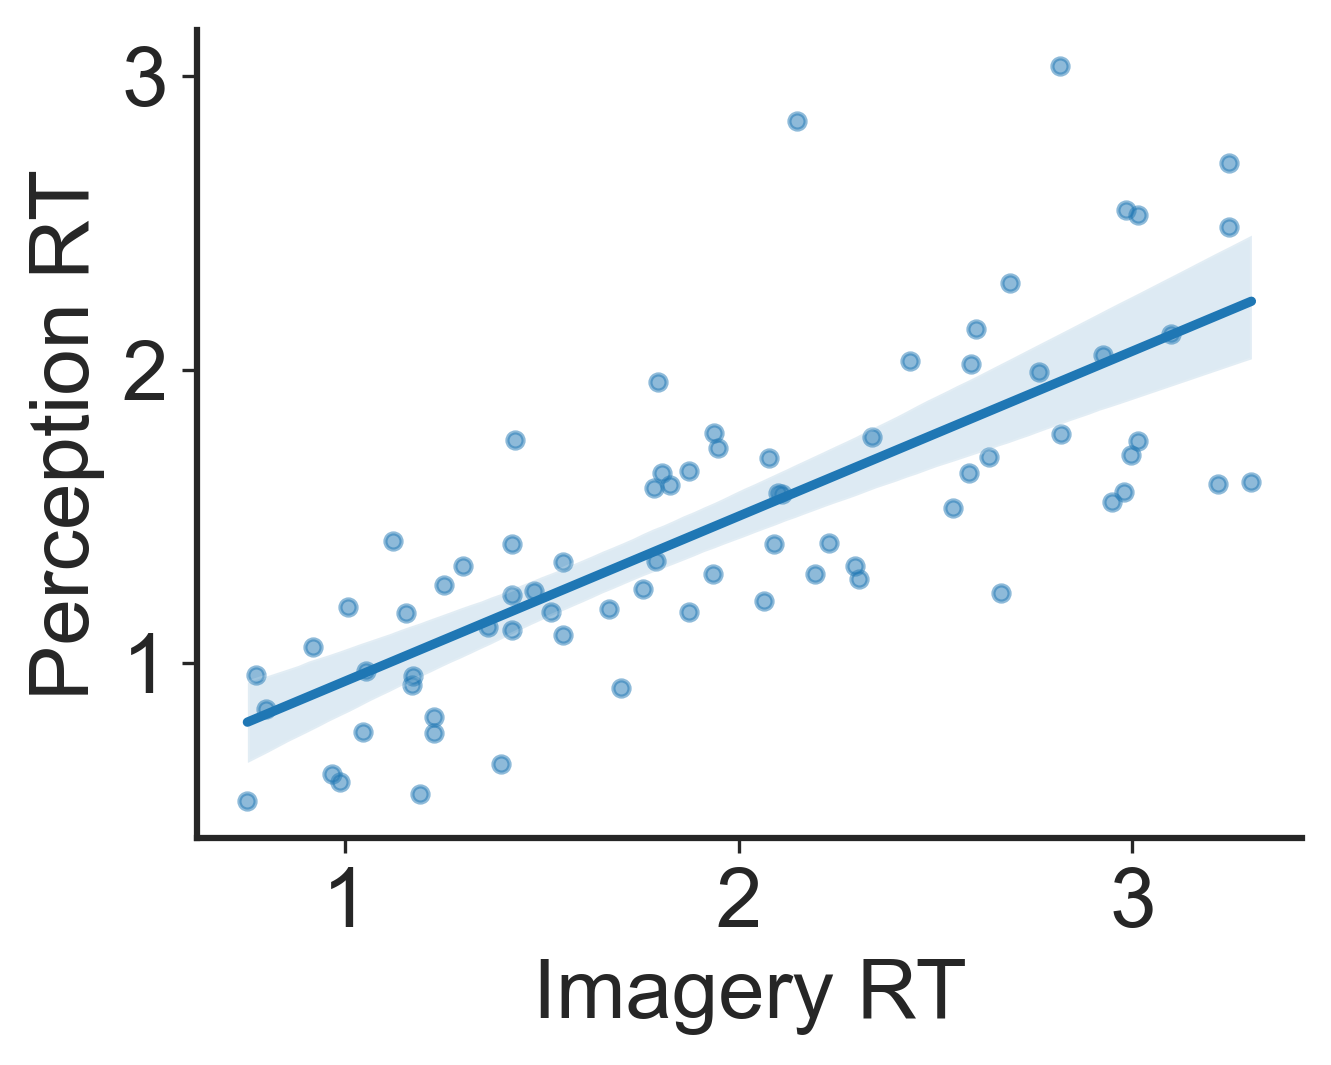

In [25]:
## RT
fig, ax = plt.subplots(figsize=(4.75, 3.5), dpi=300)
sns.regplot(x='ans_rt_imagery', y='ans_rt_perception', data=df_corr_overall, ax=ax, color='#1F77B4', scatter_kws={'s': 15, 'alpha': 0.5})
ax.tick_params(axis='both', which='major', labelsize=12)
# remove top and right
for loc in ['top', 'right']:
    ax.spines[loc].set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Imagery RT', fontsize=20)
ax.set_ylabel('Perception RT', fontsize=20)

# Add ticks on x and y axis
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
    
plt.show()

In [26]:
spearmanr(df_corr_overall['ans_rt_imagery'], df_corr_overall['ans_rt_perception'])

SpearmanrResult(correlation=0.8022475106685633, pvalue=5.093428689676734e-18)

In [27]:
## Accuracy
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=300)
sns.regplot(x='ans_corr_imagery', y='ans_corr_perception', data=df_corr_overall, ax=ax, color='#1F77B4', scatter_kws={'s': 15, 'alpha': 0.5})
ax.tick_params(axis='both', which='major', labelsize=12)
# remove top and right
for loc in ['top', 'right']:
    ax.spines[loc].set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Imagery Accuracy', fontsize=20)
ax.set_ylabel('Perception Accuracy', fontsize=20)

# Add ticks on x and y axis
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
    
plt.show()

In [28]:
spearmanr(df_corr_overall['ans_corr_imagery'], df_corr_overall['ans_corr_perception'])

SpearmanrResult(correlation=0.4824613320275046, pvalue=1.1688348162527195e-05)

## Domain Specific Performance Correlation

In [29]:
sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False).map(sns.regplot, 'ans_rt_imagery', 'ans_rt_perception', color='#1F77B4', scatter_kws={'s': 15, 'alpha': 0.5}).set_titles("{col_name}").set_axis_labels('Imagery RT', 'Perception RT')

### Accuracy (Imagery vs Perception)

In [30]:
df_corr = df_corr_include_overall.copy()

plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

df_corr['ans_corr_imagery_jitter'] = df_corr['ans_corr_imagery'] + np.random.normal(0, 0.02, len(df_corr))
df_corr['ans_corr_perception_jitter'] = df_corr['ans_corr_perception'] + np.random.normal(0, 0.02, len(df_corr))

# Define a custom plotting function
def custom_regplot(*args, **kwargs):
    color = kwargs.pop('color')
    sns.regplot(*args, **kwargs, scatter_kws={'alpha':0.5, 's':18, 'color': color})

# Create FacetGrid
g = sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False, palette=color_palette_6)

# Use the custom plotting function, passing the appropriate color
for ax, color in zip(g.axes.flat, color_palette_6):
    field_name = ax.get_title().split('=')[1].strip()
    print(field_name)
    sns.regplot(x='ans_corr_perception_jitter', y='ans_corr_imagery_jitter', data=df_corr[df_corr['field'] == field_name],
                ax=ax, color=color, scatter_kws={'alpha':0.5, 's':18})
    r, p = spearmanr(df_corr[df_corr['field'] == field_name]['ans_corr_imagery'], df_corr[df_corr['field'] == field_name]['ans_corr_perception'])
    print(f'r={r:.4f}, p={p:.4f}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_title(field_name, fontsize=15)
    ax.set_xlabel('Imagery Accuracy', fontsize=12)
    ax.set_ylabel('Perception Accuracy', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

Color
r=0.3182, p=0.0054
Face
r=0.0702, p=0.5494
Letter
r=0.5624, p=0.0000
Map
r=0.3549, p=0.0018
Shape
r=0.2235, p=0.0539
Overall
r=0.4825, p=0.0000


### RT (Imagery vs Perception)

Color:
r=0.5657, p=0.0000
Face:
r=0.4167, p=0.0002
Letter:
r=0.7118, p=0.0000
Map:
r=0.6703, p=0.0000
Shape:
r=0.5663, p=0.0000
Overall:
r=0.8022, p=0.0000


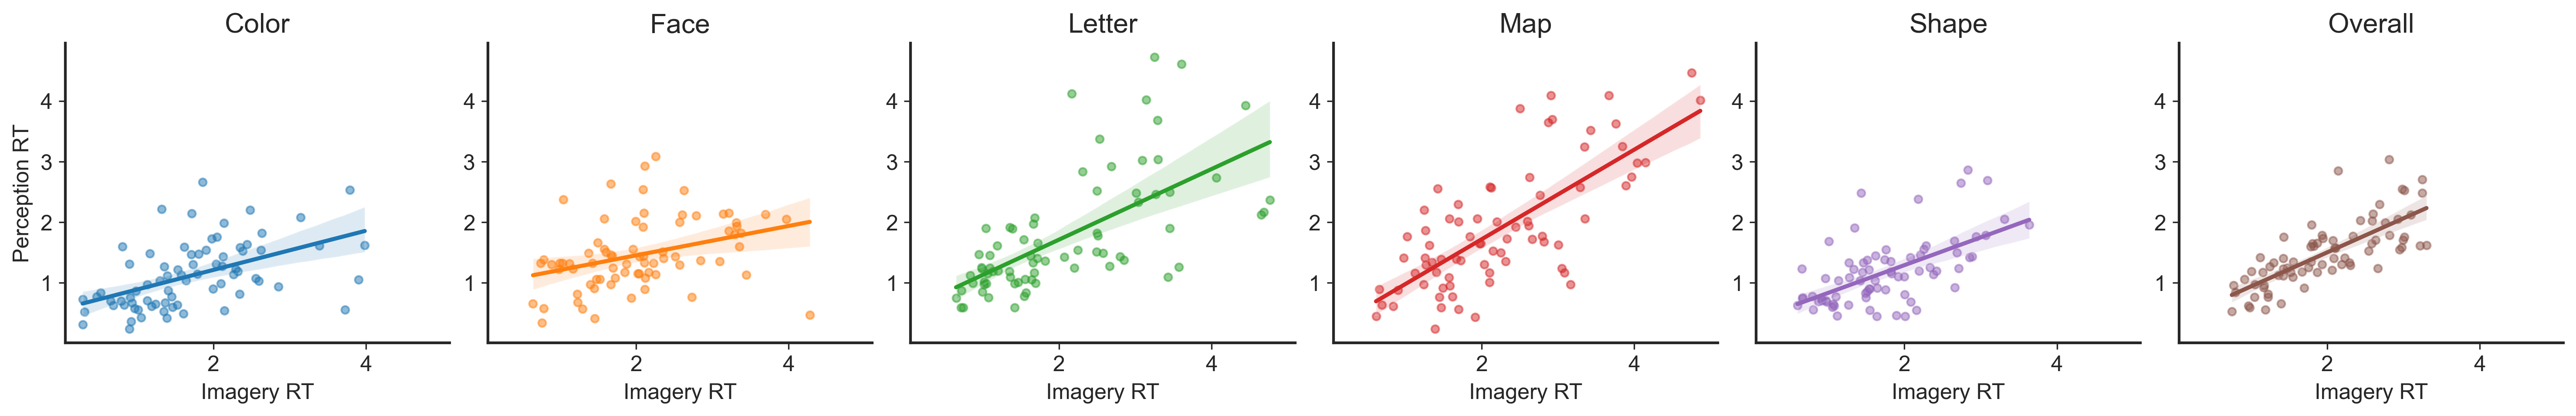

In [31]:
plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

# Define a custom plotting function
def custom_regplot(*args, **kwargs):
    color = kwargs.pop('color')
    sns.regplot(*args, **kwargs, scatter_kws={'alpha':0.5, 's':18, 'color': color})

# Create FacetGrid
g = sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False, palette=color_palette_6)

# Use the custom plotting function, passing the appropriate color
for ax, color in zip(g.axes.flat, color_palette_6):
    field_name = ax.get_title().split('=')[1].strip()
    sns.regplot(x='ans_rt_imagery', y='ans_rt_perception', data=df_corr[df_corr['field'] == field_name],
                ax=ax, color=color, scatter_kws={'alpha':0.5, 's':18})

    print(f'{field_name}:')
    r, p = spearmanr(df_corr[df_corr['field'] == field_name]['ans_rt_imagery'], df_corr[df_corr['field'] == field_name]['ans_rt_perception'])
    print(f'r={r:.4f}, p={p:.4f}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_title(field_name, fontsize=15)
    ax.set_xlabel('Imagery RT', fontsize=12)
    ax.set_ylabel('Perception RT', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

### Accuracy vs RT

Color:
r=-0.1678, p=0.1502
Face:
r=0.0246, p=0.8342
Letter:
r=-0.5658, p=0.0000
Map:
r=-0.1754, p=0.1324
Shape:
r=-0.2868, p=0.0126
Overall:
r=-0.3245, p=0.0045


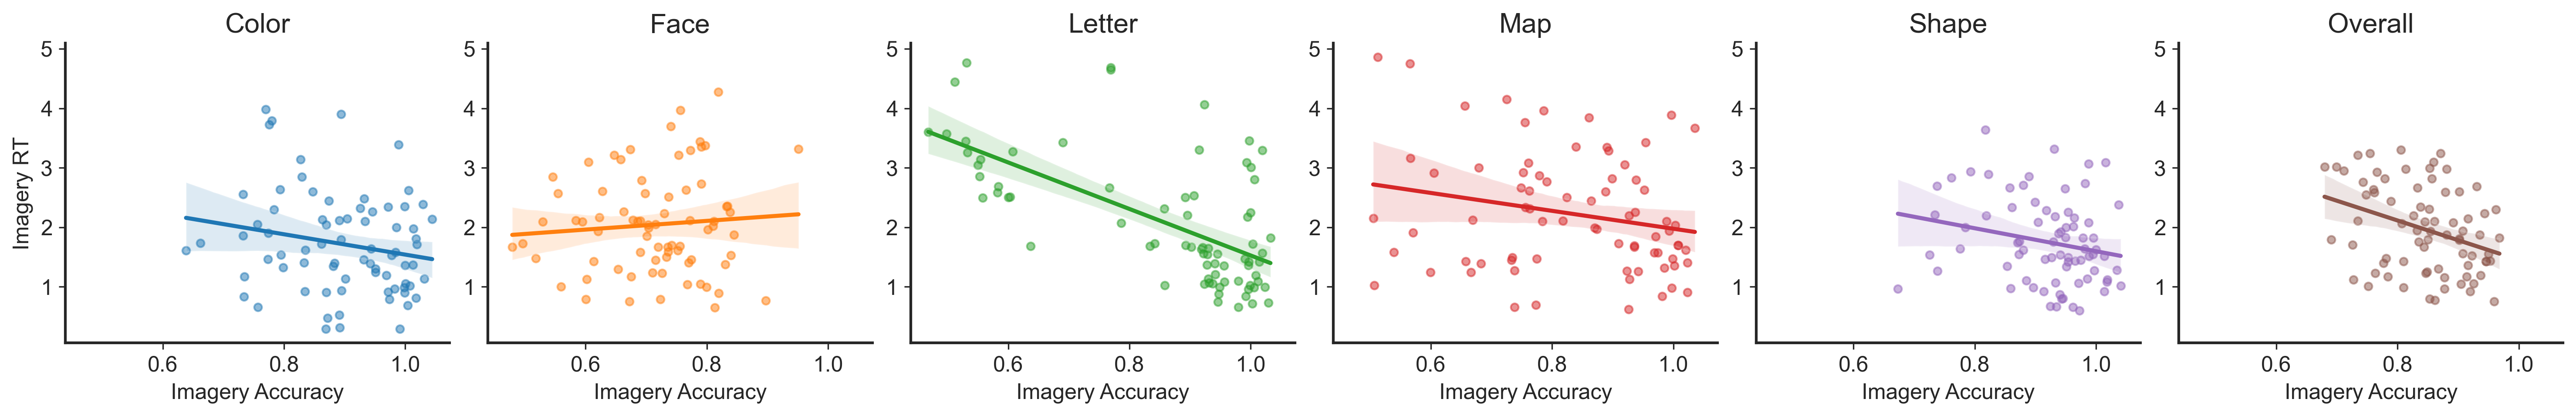

In [32]:
plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

# Define a custom plotting function
def custom_regplot(*args, **kwargs):
    color = kwargs.pop('color')
    sns.regplot(*args, **kwargs, scatter_kws={'alpha':0.5, 's':18, 'color': color})

# Create FacetGrid
g = sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False, palette=color_palette_6)

# Use the custom plotting function, passing the appropriate color
for ax, color in zip(g.axes.flat, color_palette_6):
    field_name = ax.get_title().split('=')[1].strip()
    sns.regplot(x='ans_corr_imagery_jitter', y='ans_rt_imagery', data=df_corr[df_corr['field'] == field_name],
                ax=ax, color=color, scatter_kws={'alpha':0.5, 's':18})

    print(f'{field_name}:')
    r, p = spearmanr(df_corr[df_corr['field'] == field_name]['ans_corr_imagery'], df_corr[df_corr['field'] == field_name]['ans_rt_imagery'])
    print(f'r={r:.4f}, p={p:.4f}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_title(field_name, fontsize=15)
    ax.set_xlabel('Imagery Accuracy', fontsize=12)
    ax.set_ylabel('Imagery RT', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

Color:
r=-0.2583, p=0.0253
Face:
r=-0.1421, p=0.2239
Letter:
r=-0.2972, p=0.0096
Map:
r=0.0944, p=0.4205
Shape:
r=-0.2889, p=0.0119
Overall:
r=-0.2030, p=0.0806


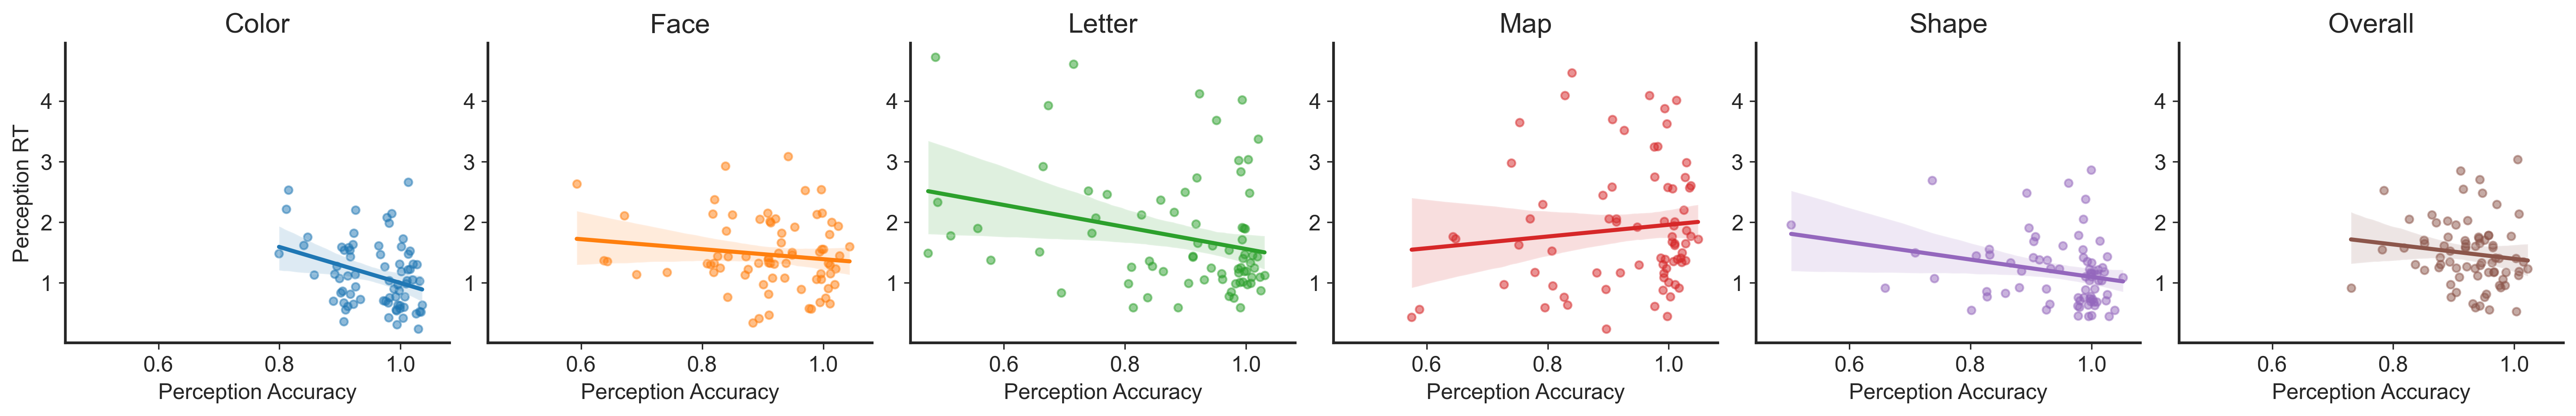

In [33]:
plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

# Define a custom plotting function
def custom_regplot(*args, **kwargs):
    color = kwargs.pop('color')
    sns.regplot(*args, **kwargs, scatter_kws={'alpha':0.5, 's':18, 'color': color})

# Create FacetGrid
g = sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False, palette=color_palette_6)

# Use the custom plotting function, passing the appropriate color
for ax, color in zip(g.axes.flat, color_palette_6):
    field_name = ax.get_title().split('=')[1].strip()
    sns.regplot(x='ans_corr_perception_jitter', y='ans_rt_perception', data=df_corr[df_corr['field'] == field_name],
                ax=ax, color=color, scatter_kws={'alpha':0.5, 's':18})

    print(f'{field_name}:')
    r, p = spearmanr(df_corr[df_corr['field'] == field_name]['ans_corr_perception'], df_corr[df_corr['field'] == field_name]['ans_rt_perception'])
    print(f'r={r:.4f}, p={p:.4f}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_title(field_name, fontsize=15)
    ax.set_xlabel('Perception Accuracy', fontsize=12)
    ax.set_ylabel('Perception RT', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

Color:
r=-0.2585, p=0.0251
Face:
r=-0.0651, p=0.5791
Letter:
r=-0.0360, p=0.7593
Map:
r=0.0452, p=0.7004
Shape:
r=-0.2673, p=0.0204
Overall:
r=0.0732, p=0.5326


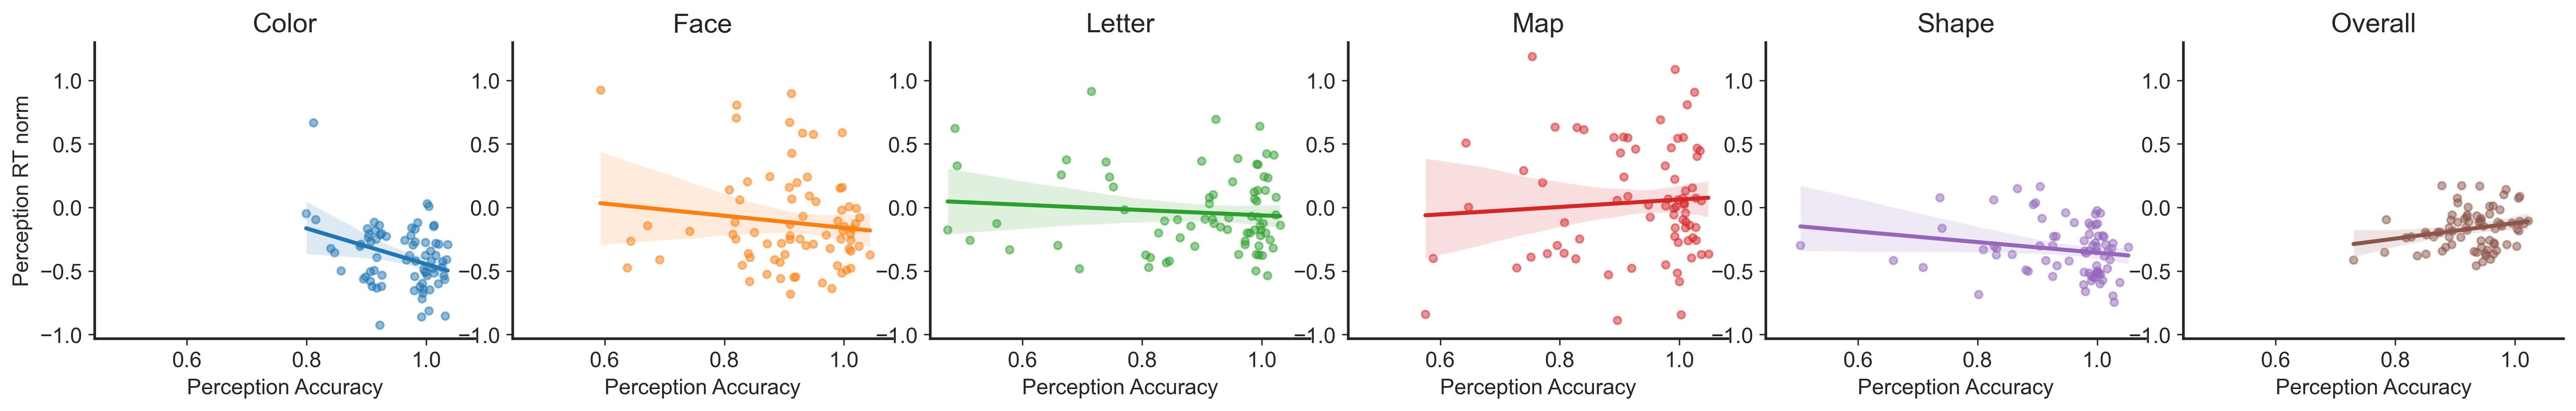

In [34]:
plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

# Define a custom plotting function
def custom_regplot(*args, **kwargs):
    color = kwargs.pop('color')
    sns.regplot(*args, **kwargs, scatter_kws={'alpha':0.5, 's':18, 'color': color})

# Create FacetGrid
g = sns.FacetGrid(df_corr, col="field", col_wrap=6, height=3, aspect=1.1, margin_titles=False, palette=color_palette_6)

# Use the custom plotting function, passing the appropriate color
for ax, color in zip(g.axes.flat, color_palette_6):
    field_name = ax.get_title().split('=')[1].strip()
    sns.regplot(x='ans_corr_perception_jitter', y='ans_rt_norm_perception', data=df_corr[df_corr['field'] == field_name],
                ax=ax, color=color, scatter_kws={'alpha':0.5, 's':18})

    print(f'{field_name}:')
    r, p = spearmanr(df_corr[df_corr['field'] == field_name]['ans_corr_perception'], df_corr[df_corr['field'] == field_name]['ans_rt_norm_perception'])
    print(f'r={r:.4f}, p={p:.4f}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_title(field_name, fontsize=15)
    ax.set_xlabel('Perception Accuracy', fontsize=12)
    ax.set_ylabel('Perception RT norm', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

## Correlation Matrix RT (all domains, imagery and perception)

In [51]:
df_corr_no_overall = df_corr[df_corr['field'] != 'Overall']
df_corr_imagery_rt = df_corr_no_overall[['participant', 'field', 'ans_rt_imagery']]
df_corr_imagery_rt_pivot = df_corr_imagery_rt.pivot(index='participant', columns='field', values='ans_rt_imagery').reset_index()
df_corr_imagery_rt_pivot.head()

df_corr_perception_rt = df_corr_no_overall[['participant', 'field', 'ans_rt_perception']]
df_corr_perception_rt_pivot = df_corr_perception_rt.pivot(index='participant', columns='field', values='ans_rt_perception').reset_index()

df_corr_iorp_rt_pivot = df_corr_imagery_rt_pivot.merge(df_corr_perception_rt_pivot, on='participant', suffixes=(' imagery', ' perception'))
df_corr_iorp_rt_pivot.columns

Index(['participant', 'Color imagery', 'Face imagery', 'Letter imagery',
       'Map imagery', 'Shape imagery', 'Color perception', 'Face perception',
       'Letter perception', 'Map perception', 'Shape perception'],
      dtype='object', name='field')

In [52]:
# df_corr_iorp_rt_pivot.to_csv('df_corr_iorp_rt_pivot.csv', index=False)

In [53]:
# do a spearman correlation for each two combinations of columns
from itertools import combinations
df_rt_spearman = pd.DataFrame(columns=['field1', 'field2', 'r', 'p'])

for field1, field2 in combinations(df_corr_iorp_rt_pivot.columns[1:], 2):
    r, p = spearmanr(df_corr_iorp_rt_pivot[field1], df_corr_iorp_rt_pivot[field2])
    df_rt_spearman = df_rt_spearman.append({'field1': field1, 'field2': field2, 'r': r, 'p': p}, ignore_index=True)

print(df_rt_spearman)

               field1             field2         r             p
0       Color imagery       Face imagery  0.707681  1.258835e-12
1       Color imagery     Letter imagery  0.698691  3.174907e-12
2       Color imagery        Map imagery  0.583385  3.957860e-08
3       Color imagery      Shape imagery  0.711351  8.542610e-13
4       Color imagery   Color perception  0.565690  1.233433e-07
5       Color imagery    Face perception  0.255135  2.716610e-02
6       Color imagery  Letter perception  0.604239  9.476577e-09
7       Color imagery     Map perception  0.353542  1.861499e-03
8       Color imagery   Shape perception  0.489758  8.214789e-06
9        Face imagery     Letter imagery  0.541735  5.189398e-07
10       Face imagery        Map imagery  0.650242  2.729910e-10
11       Face imagery      Shape imagery  0.663983  8.388661e-11
12       Face imagery   Color perception  0.447681  5.644555e-05
13       Face imagery    Face perception  0.416700  2.001919e-04
14       Face imagery  Le

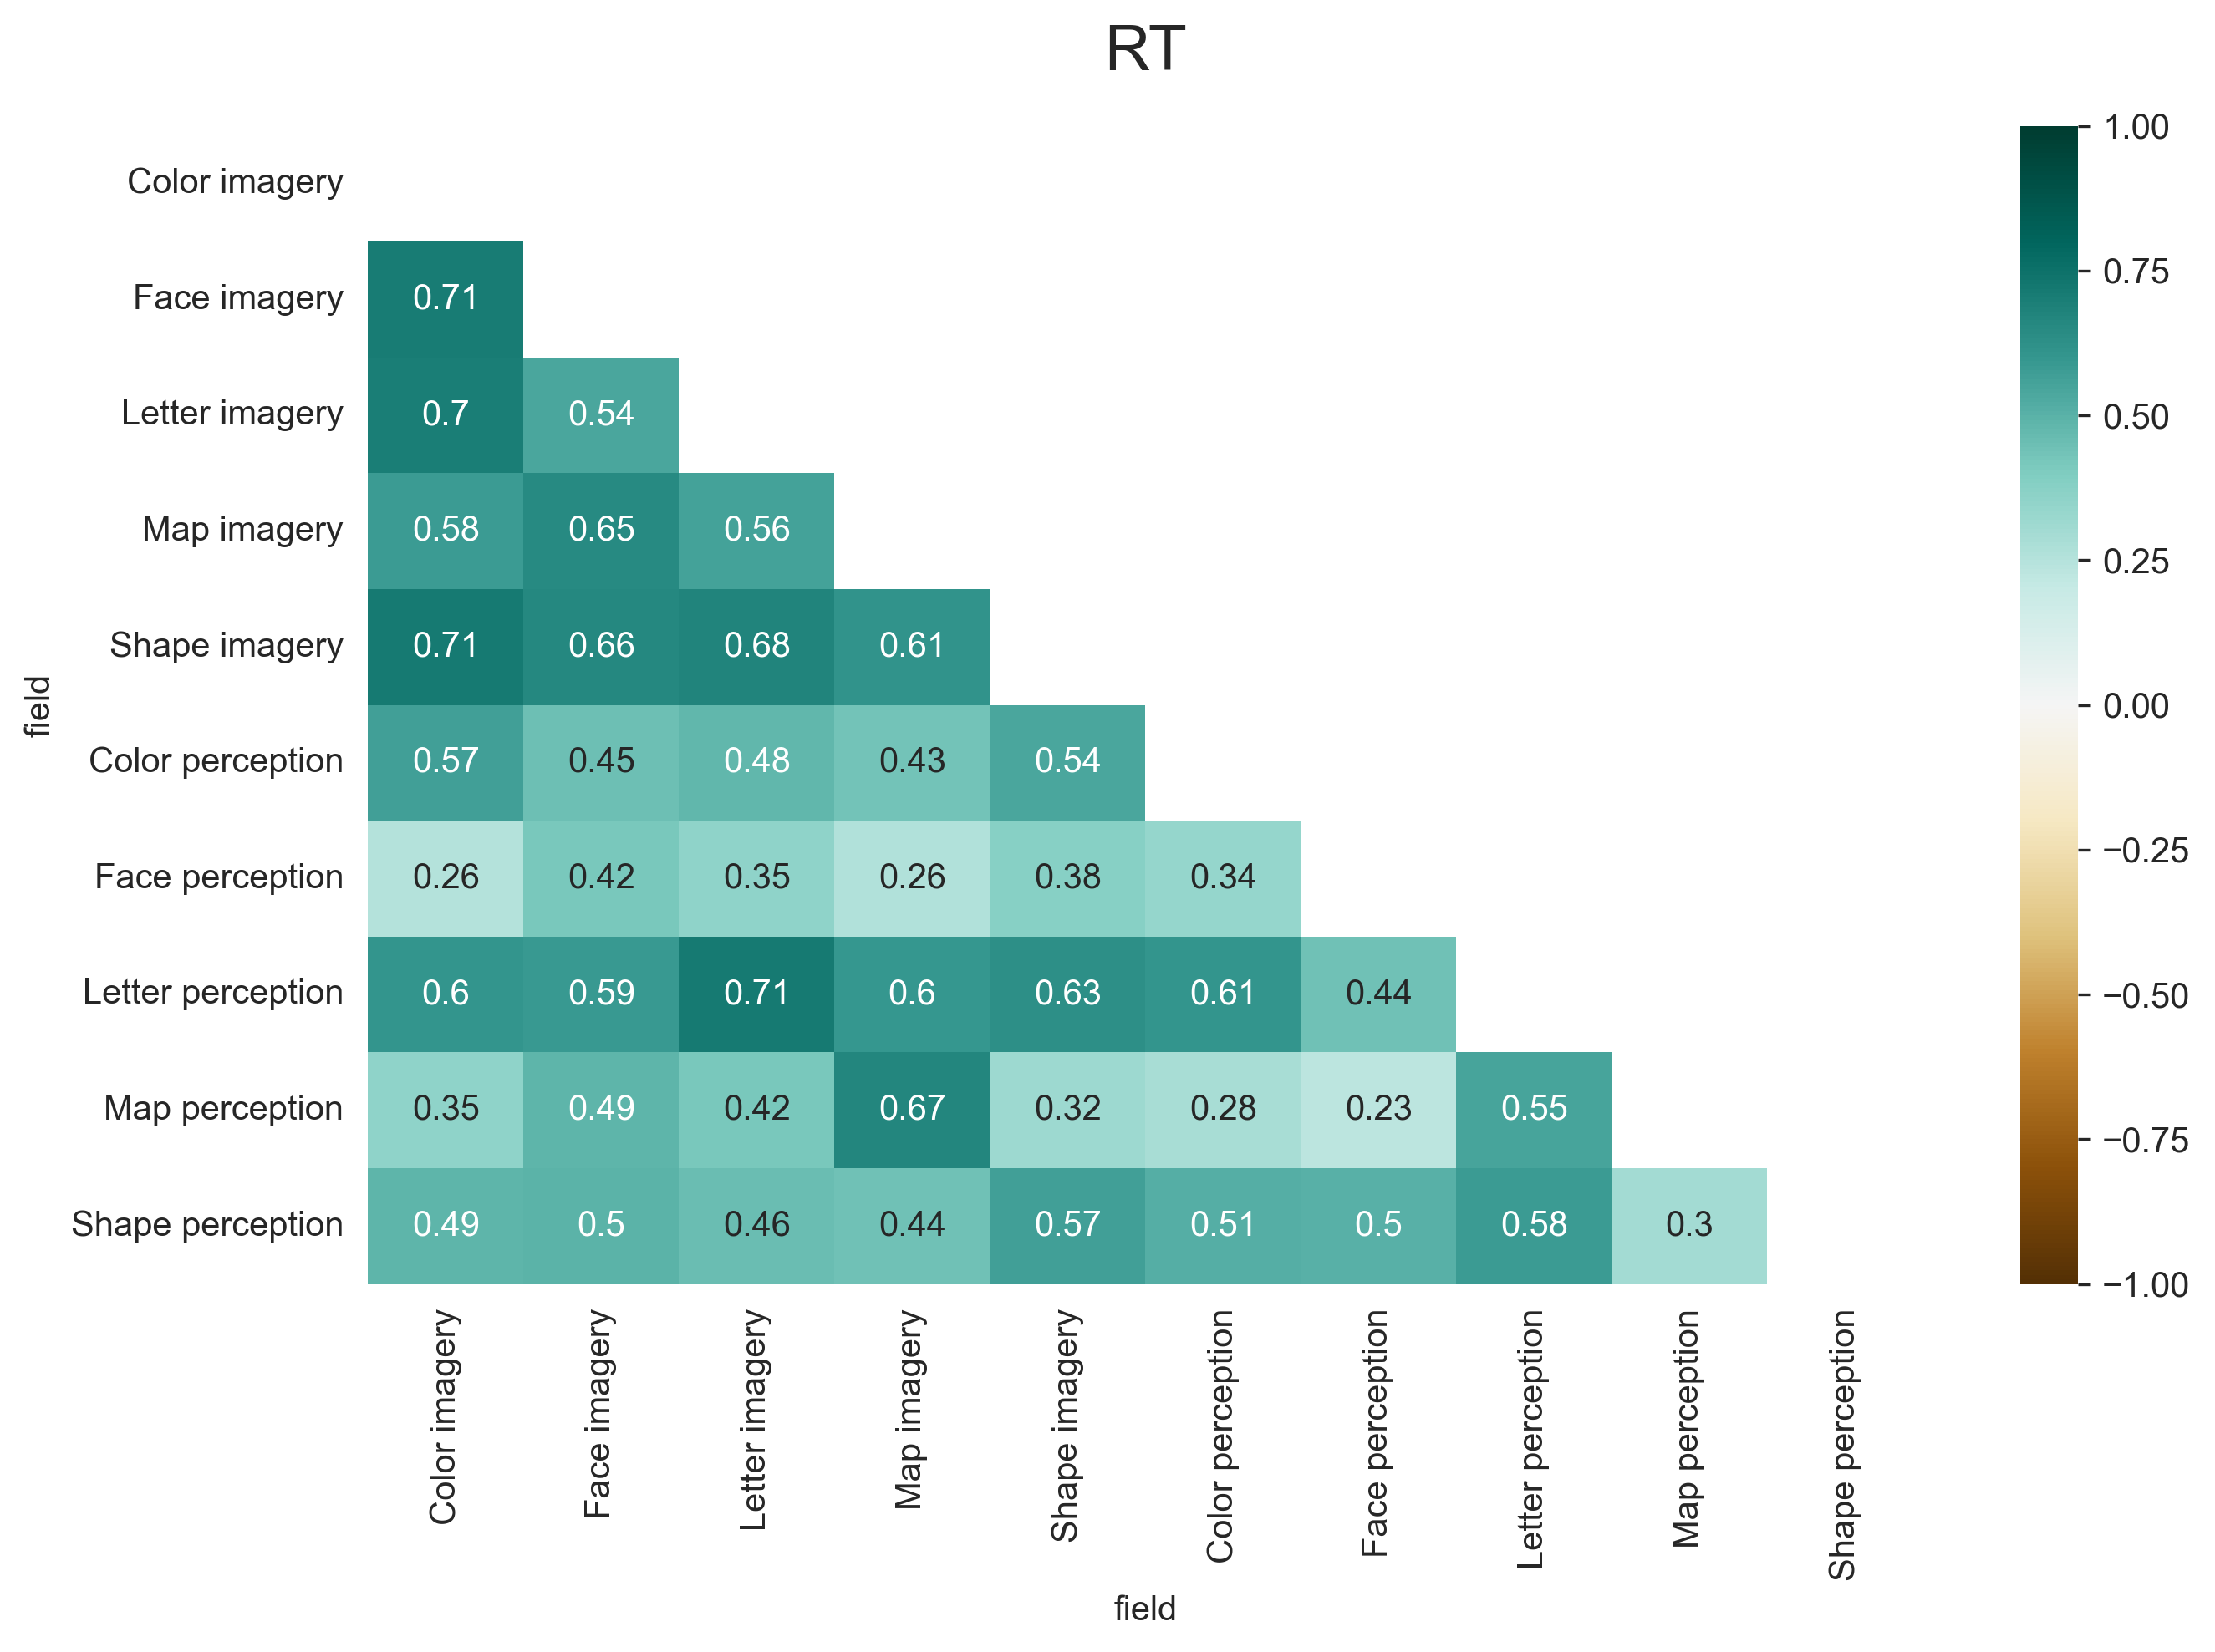

In [54]:
# triangle correlation plot
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df_corr_iorp_rt_pivot.corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(df_corr_iorp_rt_pivot.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('RT', fontdict={'fontsize':18}, pad=16);

## Correlation Matrix normed RT (all domains, imagery and perception)

In [55]:
df_corr_no_overall = df_corr[df_corr['field'] != 'Overall']
df_corr_imagery_rt_norm = df_corr_no_overall[['participant', 'field', 'ans_rt_norm_imagery']]
df_corr_imagery_rt_norm_pivot = df_corr_imagery_rt_norm.pivot(index='participant', columns='field', values='ans_rt_norm_imagery').reset_index()

df_corr_perception_rt_norm = df_corr_no_overall[['participant', 'field', 'ans_rt_norm_perception']]
df_corr_perception_rt_norm_pivot = df_corr_perception_rt_norm.pivot(index='participant', columns='field', values='ans_rt_norm_perception').reset_index()

df_corr_iorp_rt_norm_pivot = df_corr_imagery_rt_norm_pivot.merge(df_corr_perception_rt_norm_pivot, on='participant', suffixes=('_imagery', '_perception'))
df_corr_iorp_rt_norm_pivot.columns

Index(['participant', 'Color_imagery', 'Face_imagery', 'Letter_imagery',
       'Map_imagery', 'Shape_imagery', 'Color_perception', 'Face_perception',
       'Letter_perception', 'Map_perception', 'Shape_perception'],
      dtype='object', name='field')

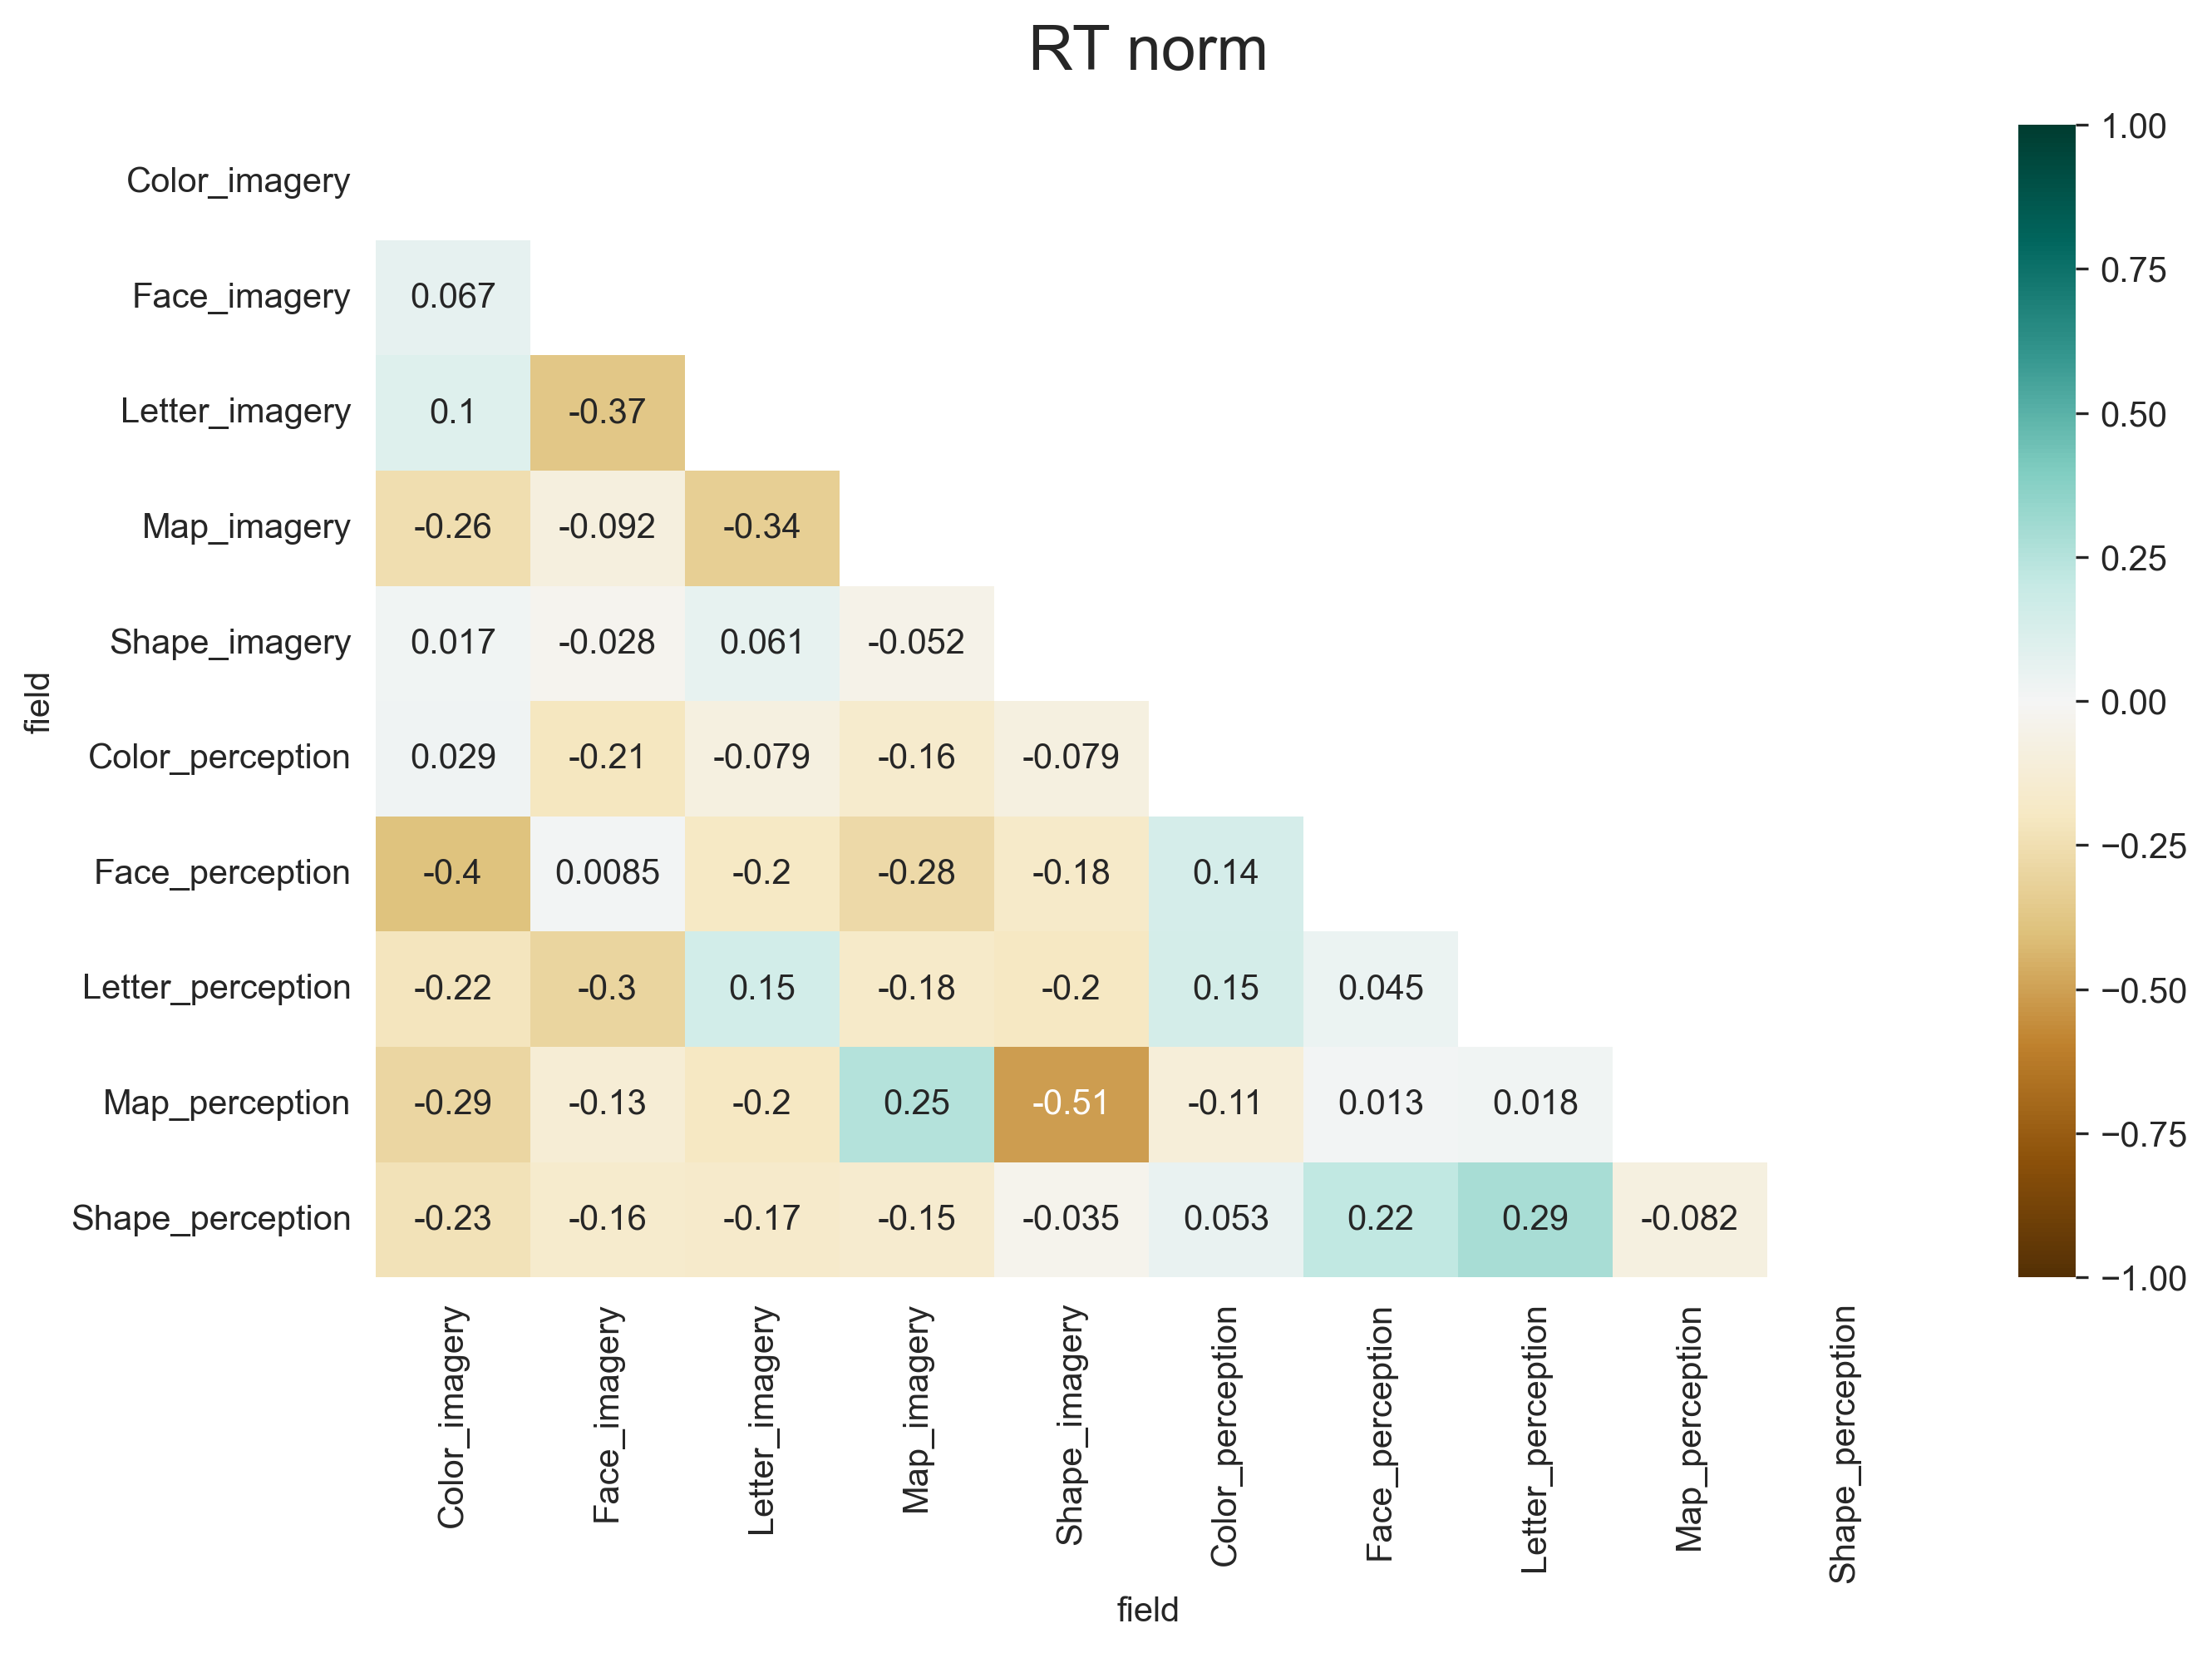

In [58]:
# triangle correlation plot
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df_corr_iorp_rt_norm_pivot.corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(df_corr_iorp_rt_norm_pivot.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('RT norm', fontdict={'fontsize':18}, pad=16);

In [59]:
# do a spearman correlation for each two combinations of columns
from itertools import combinations
df_rt_norm_spearman = pd.DataFrame(columns=['field1', 'field2', 'r', 'p'])

for field1, field2 in combinations(df_corr_iorp_rt_norm_pivot.columns[1:], 2):
    r, p = spearmanr(df_corr_iorp_rt_norm_pivot[field1], df_corr_iorp_rt_norm_pivot[field2])
    df_rt_norm_spearman = df_rt_norm_spearman.append({'field1': field1, 'field2': field2, 'r': r, 'p': p}, ignore_index=True)

print(df_rt_norm_spearman)

               field1             field2         r         p
0       Color_imagery       Face_imagery  0.067169  0.566929
1       Color_imagery     Letter_imagery  0.099886  0.393856
2       Color_imagery        Map_imagery -0.257496  0.025729
3       Color_imagery      Shape_imagery  0.017297  0.882900
4       Color_imagery   Color_perception  0.028734  0.806677
5       Color_imagery    Face_perception -0.395818  0.000440
6       Color_imagery  Letter_perception -0.217525  0.060835
7       Color_imagery     Map_perception -0.294339  0.010369
8       Color_imagery   Shape_perception -0.232233  0.044972
9        Face_imagery     Letter_imagery -0.373570  0.000963
10       Face_imagery        Map_imagery -0.091636  0.434269
11       Face_imagery      Shape_imagery -0.027824  0.812689
12       Face_imagery   Color_perception -0.206799  0.075051
13       Face_imagery    Face_perception  0.008478  0.942451
14       Face_imagery  Letter_perception -0.302987  0.008235
15       Face_imagery   

## Correlation Matrix Accuracy (all domains, imagery and perception)

In [61]:
df_corr_no_overall = df_corr[df_corr['field'] != 'Overall']
df_corr_imagery_acc = df_corr_no_overall[['participant', 'field', 'ans_corr_imagery']]
df_corr_imagery_acc_pivot = df_corr_imagery_acc.pivot(index='participant', columns='field', values='ans_corr_imagery').reset_index()

df_corr_perception_acc = df_corr_no_overall[['participant', 'field', 'ans_corr_perception']]
df_corr_perception_acc_pivot = df_corr_perception_acc.pivot(index='participant', columns='field', values='ans_corr_perception').reset_index()

df_corr_iorp_acc_pivot = df_corr_imagery_acc_pivot.merge(df_corr_perception_acc_pivot, on='participant', suffixes=(' imagery', ' perception'))

In [62]:
# df_corr_iorp_acc_pivot.to_csv('df_corr_iorp_acc_pivot.csv', index=False)

Text(0.5, 1.0, 'Accuracy')

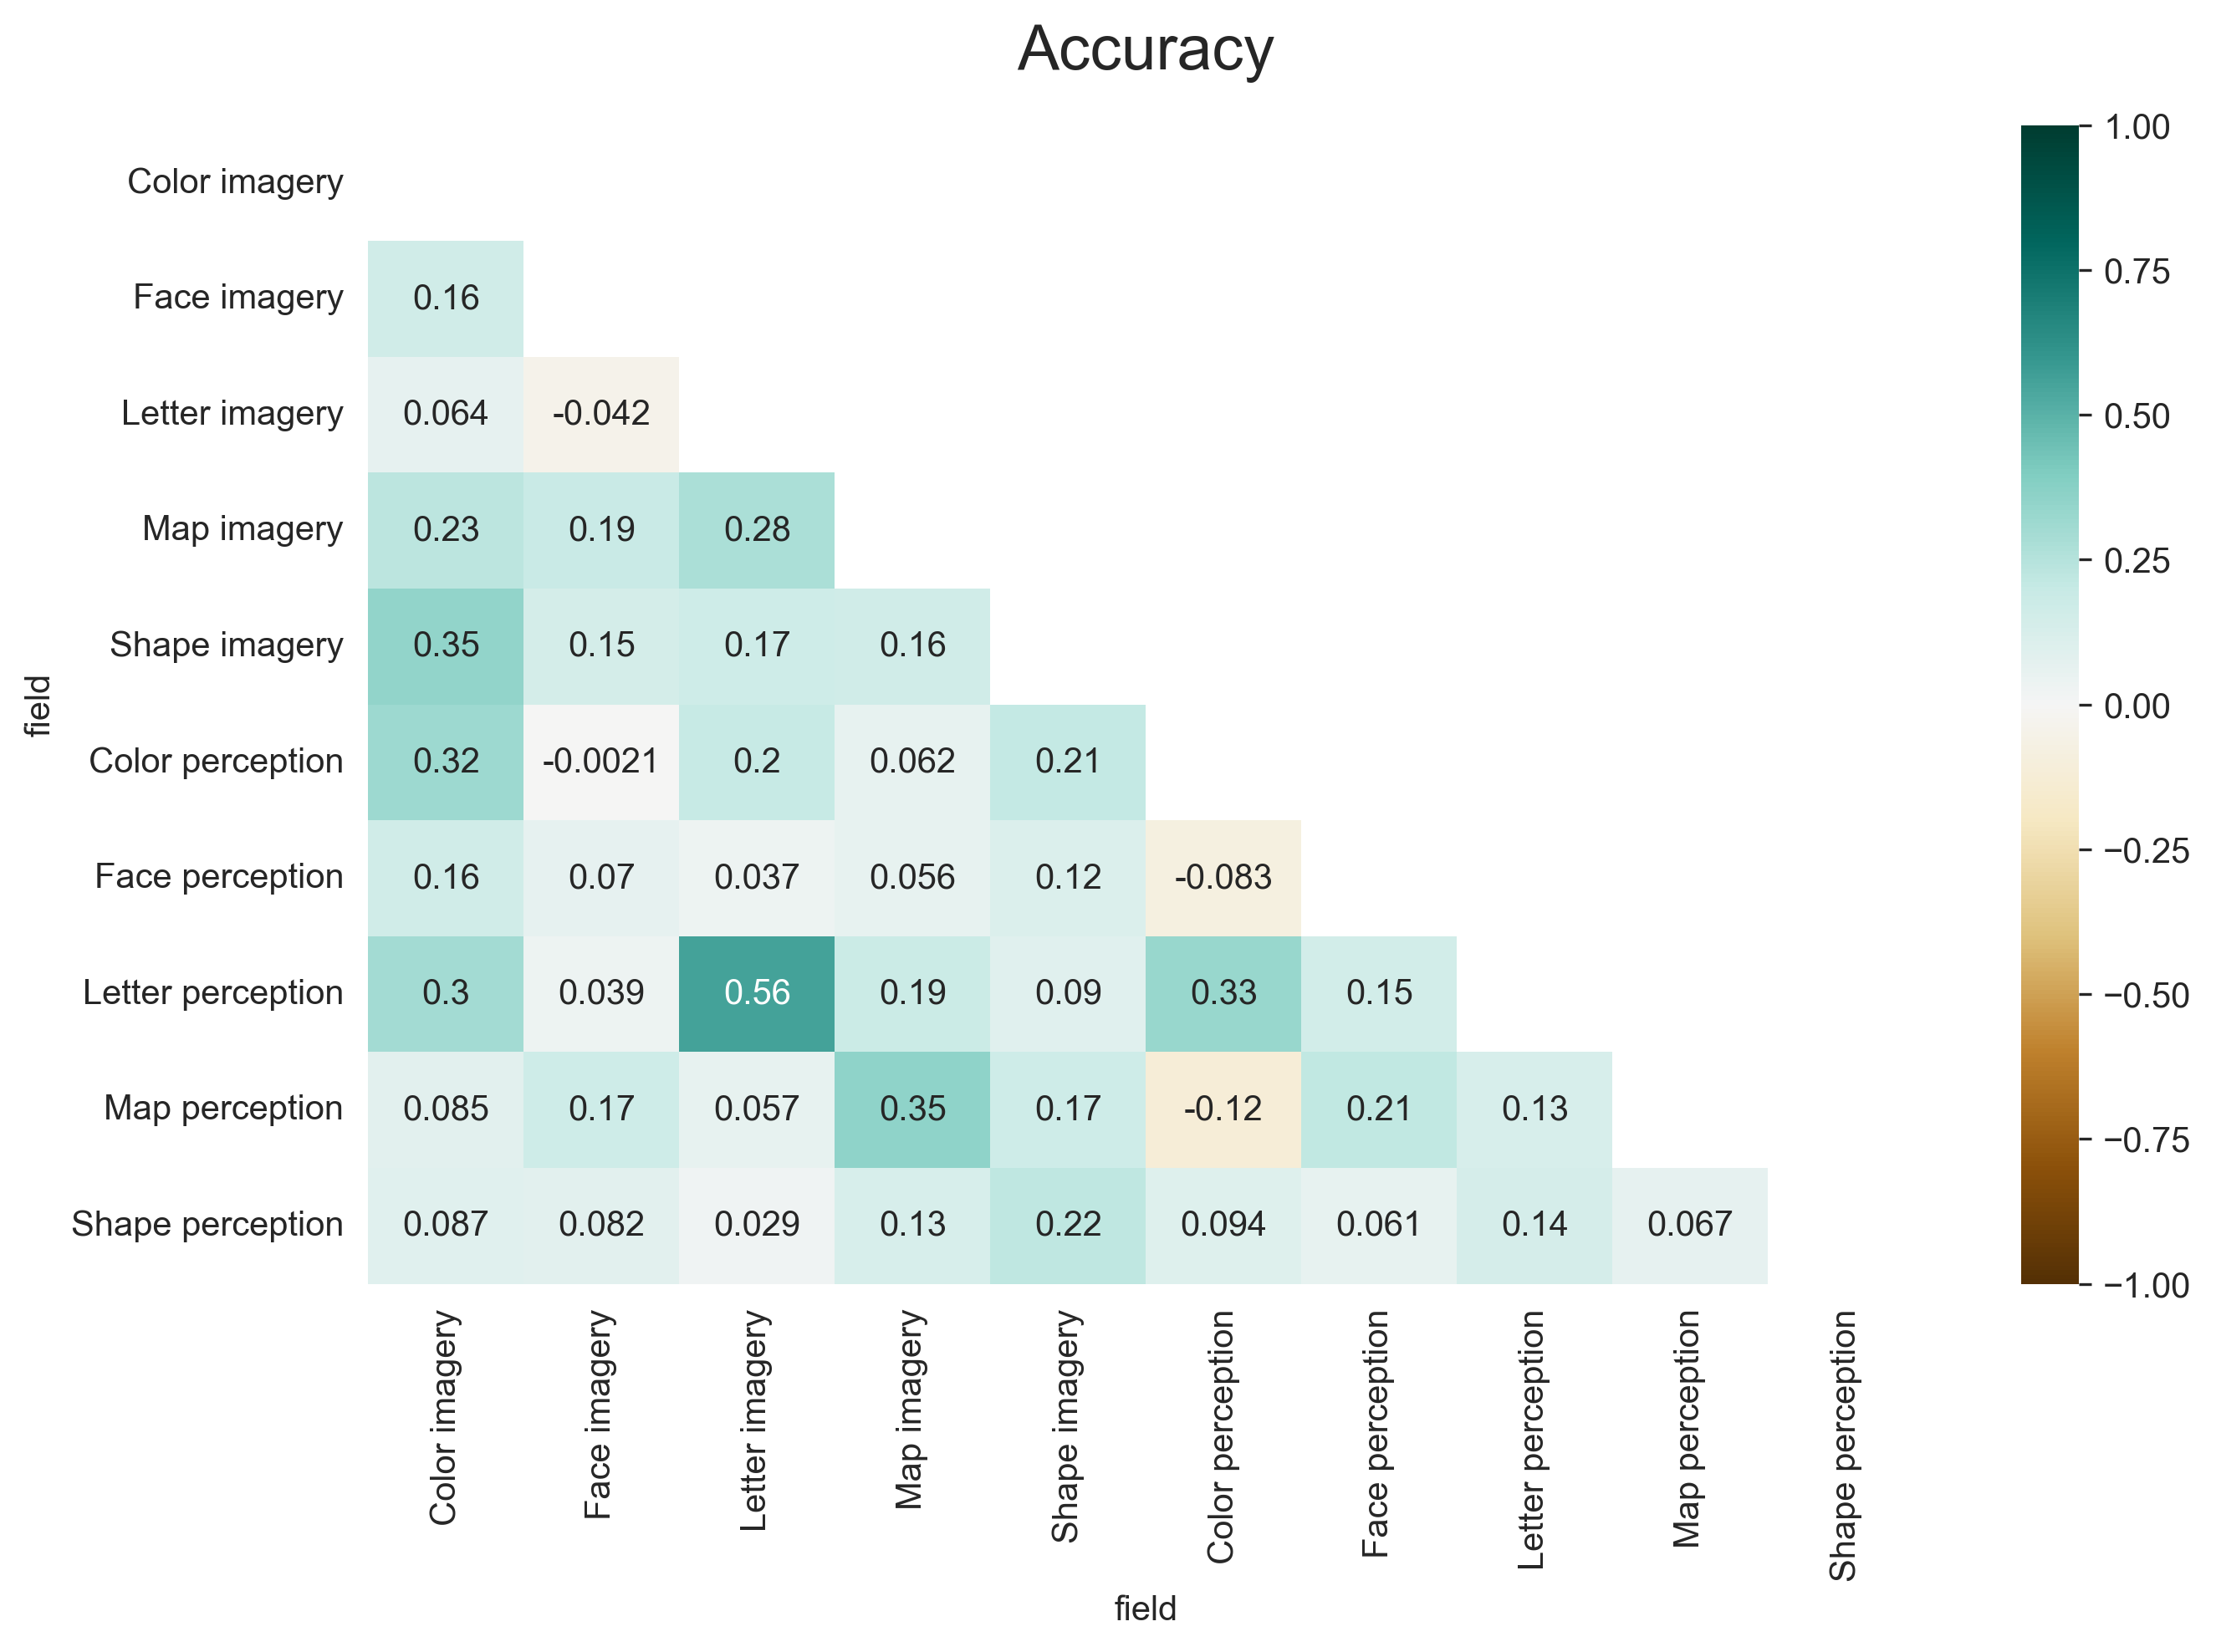

In [63]:
# triangle correlation plot
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df_corr_iorp_acc_pivot.corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(df_corr_iorp_acc_pivot.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Accuracy', fontdict={'fontsize':18}, pad=16)

In [64]:
# do a spearman correlation for each two combinations of columns
from itertools import combinations
df_acc_spearman = pd.DataFrame(columns=['field1', 'field2', 'r', 'p'])

for field1, field2 in combinations(df_corr_iorp_acc_pivot.columns[1:], 2):
    r, p = spearmanr(df_corr_iorp_acc_pivot[field1], df_corr_iorp_acc_pivot[field2])
    df_acc_spearman = df_acc_spearman.append({'field1': field1, 'field2': field2, 'r': r, 'p': p}, ignore_index=True)

print(df_acc_spearman)

               field1             field2         r             p
0       Color imagery       Face imagery  0.158432  1.745875e-01
1       Color imagery     Letter imagery  0.063642  5.875105e-01
2       Color imagery        Map imagery  0.233415  4.386138e-02
3       Color imagery      Shape imagery  0.350203  2.069492e-03
4       Color imagery   Color perception  0.318188  5.402499e-03
5       Color imagery    Face perception  0.161744  1.656356e-01
6       Color imagery  Letter perception  0.301371  8.601424e-03
7       Color imagery     Map perception  0.085284  4.669179e-01
8       Color imagery   Shape perception  0.086588  4.601074e-01
9        Face imagery     Letter imagery -0.042215  7.191371e-01
10       Face imagery        Map imagery  0.190423  1.017510e-01
11       Face imagery      Shape imagery  0.146767  2.089313e-01
12       Face imagery   Color perception -0.002130  9.855271e-01
13       Face imagery    Face perception  0.070220  5.494088e-01
14       Face imagery  Le